<a href="https://colab.research.google.com/github/LucasHLirio/tcc_1/blob/main/Exemplo_NASLib_TCC_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de utilização do NASLib para AutoML

TCC I - Lucas Henrique L. Costa

### Baseado no tutorial do [NASLib](https://github.com/automl/NASLib/blob/automl-fall-school-2022/tutorial/NASLib%20Tutorial.ipynb) no GitHub 


Sumário:
1. [Configurando o NASLib](#setup)
2. [Espaço de busca](#search_spaces)
3. [Otimizadores](#optimizers)


<a name="setup"></a>
# 1. Configurando o NASLib 

Clonando o NASLib do repositório do GitHub

(Você pode ignorar os warnings relacionados ao *lightgbm*)

In [ ]:
# Setup NASLib
%cd /content
%rm -rf NASLib
!git clone --depth 1 https://github.com/automl/NASLib/
%cd /content/NASLib
!pip install -e . --quiet

/content
Cloning into 'NASLib'...
remote: Enumerating objects: 574, done.
remote: Counting objects: 100% (574/574), done.
remote: Compressing objects: 100% (483/483), done.
remote: Total 574 (delta 145), reused 298 (delta 79), pack-reused 0
Receiving objects: 100% (574/574), 10.81 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (145/145), done.
/content/NASLib
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.6/280.6 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 KB 4.1 MB/s eta 0:

Você pode ignorar os warnings relacionados ao *lightgbm*.

Execute para certificar que o NASLib foi instalado corretamente:

In [ ]:
import naslib

Baixando conjuntos de dados e arquivos de benchmark para usar neste notebook:


1. "Crie um atalho" para [esta pasta compartilhada](https://drive.google.com/file/d/1xjs6y2cf_mXKFjrT1auAynLMg48onQ5R/view?usp=share_link) no Google Drive (ou faça o dowload e suba o arquivo para seu drive na pasta raiz - MyDrive)
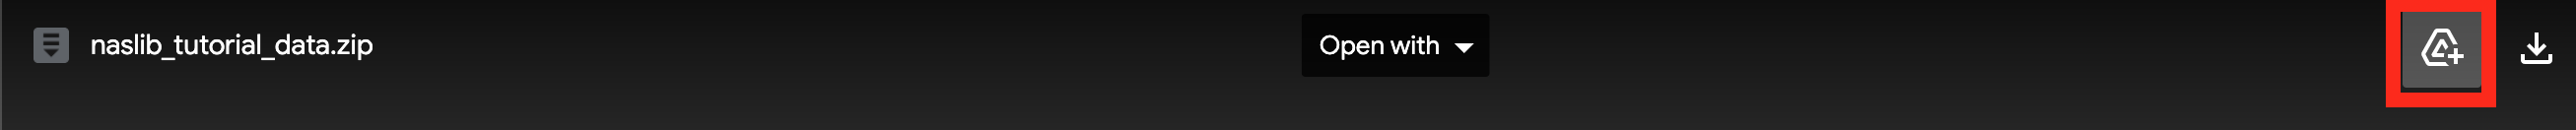
2. Execute a próxima célula para montar seu drive

3. Preencha a outra célula seguinte com o caminho para o seu atalho(/content/drive/MyDrive/data.zip), e execute para descompactar o conteúdo na pasta de dados (/content/NASLib/naslib)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/data.zip -d /content/NASLib/naslib

Archive:  /content/drive/MyDrive/data.zip
  inflating: /content/NASLib/naslib/data/train_data_batch_1  
  inflating: /content/NASLib/naslib/__MACOSX/data/._train_data_batch_1  
  inflating: /content/NASLib/naslib/data/nb301_full_training.pickle  
  inflating: /content/NASLib/naslib/__MACOSX/data/._nb301_full_training.pickle  
  inflating: /content/NASLib/naslib/data/nb201_ImageNet16_full_training.pickle  
  inflating: /content/NASLib/naslib/__MACOSX/data/._nb201_ImageNet16_full_training.pickle  
  inflating: /content/NASLib/naslib/data/nb201_cifar10_full_training.pickle  
  inflating: /content/NASLib/naslib/__MACOSX/data/._nb201_cifar10_full_training.pickle  
  inflating: /content/NASLib/naslib/data/zc_nasbench201.json  
  inflating: /content/NASLib/naslib/__MACOSX/data/._zc_nasbench201.json  
  inflating: /content/NASLib/naslib/data/nb201_cifar100_full_training.pickle  
  inflating: /content/NASLib/naslib/__MACOSX/data/._nb201_cifar100_full_training.pickle  
  inflating: /content/NASL

Com estes passos a configuração está concluída e podemos passar para a próxima seção:


<a name="search_spaces"></a>
# 2. Espaço de Busca NASLib 

O NASLib suporta vários espaços de busca e benchmarks como:

1. [NAS-Bench-101](https://arxiv.org/pdf/1902.09635.pdf)
2. [NAS-Bench-201](https://arxiv.org/pdf/2001.00326.pdf)
3. [NAS-Bench-301](https://arxiv.org/pdf/2008.09777.pdf)
4. [TransNAS-Bench-101](https://arxiv.org/pdf/2105.11871.pdf)

Neste exemplo vamos utilizar o NAS-Bench-201.

Primeiro começamos importando o espaço de busca:


In [ ]:

from naslib.search_spaces import NasBench201SearchSpace
# Crie um novo objeto de espaço de busca vazio que represente todo o espaço de busca
graph = NasBench201SearchSpace(n_classes=10) # O CIFAR-10 dataset requer 10 classes

In [ ]:
#Amostrando uma arquitetura aleatória - (este método é chamado apenas uma vez)
graph.sample_random_architecture()

# Analisando a arquitetura amostrada em um modelo PyTorch - etapa opcional
graph.parse()

# Obtendo a representação NASLib do modelo amostrado
graph.get_hash()

(3, 4, 4, 1, 1, 0)

In [ ]:
# Código de importação para converter gráfico NASLib para a representação NAS-Bench-201 original
from naslib.search_spaces.nasbench201.conversions import convert_naslib_to_str as convert_naslib_nb201_to_str

# Obtenha a representação em string deste modelo
convert_naslib_nb201_to_str(graph)

'|nor_conv_1x1~0|+|avg_pool_3x3~0|none~1|+|avg_pool_3x3~0|none~1|skip_connect~2|'

In [ ]:
# Mutando a arquitetura. Primeiro, crie um novo grafo filho
child_graph = NasBench201SearchSpace(n_classes=10)

# Chame a mutação no gráfico filho passando o gráfico pai como parâmetro
child_graph.mutate(parent=graph)

# Veja as representações gráficas do pai e filho
print(f'Parent graph: {graph.get_hash()}')
print(f'Child graph : {child_graph.get_hash()}')

Parent graph: (3, 4, 4, 1, 1, 0)
Child graph : (3, 0, 4, 1, 1, 0)


Agora, vamos carregar a API do NAS-Bench-201

Esta API possui as métricas de treinamento de todos os vários modelos no espaço de pesquisa como precisão/perdas de treinamento e validação em cada época

In [ ]:
from naslib.utils import get_dataset_api
benchmark_api = get_dataset_api(search_space='nasbench201', dataset='cifar10')

In [ ]:
#Importando as APIs dos benchmarks - carregue apenas uma vez
dataset_apis={}
dataset_apis["NASBench201-cifar10"] = get_dataset_api(search_space='nasbench201', dataset='cifar10')
# dataset_apis["NASBench101-cifar10"] = get_dataset_api(search_space='nasbench101', dataset='cifar10')
# dataset_apis["NASBench201-cifar100"] = get_dataset_api(search_space='nasbench201', dataset='cifar100')
# dataset_apis["NASBench201-ImageNet16-120"] = get_dataset_api(search_space='nasbench201', dataset='ImageNet16-120')
# dataset_apis["NASBench301-cifar10"] = get_dataset_api(search_space='nasbench301', dataset='cifar10')

Com a API do NAS-Bench-201, agora podemos consultar o desempenho de validação de qualquer modelo NB201. Sem isso, teríamos que treinar o modelo do zero para obter essas informações

In [ ]:
# Importando a as métricas
from naslib.search_spaces.core import Metric

# Valores:
# Metric.TRAIN_ACCURACY
# Metric.VAL_ACCURACY
# Metric.TRAIN_LOSS
# Metric.TEST_LOSS
# Metric.TRAIN_TIME

train_acc_parent = graph.query(metric=Metric.TRAIN_ACCURACY, dataset='cifar10', dataset_api=dataset_apis["NASBench201-cifar10"])
val_acc_parent = graph.query(metric=Metric.VAL_ACCURACY, dataset='cifar10', dataset_api=dataset_apis["NASBench201-cifar10"])
train_loss_parent = graph.query(metric=Metric.TRAIN_LOSS, dataset='cifar10', dataset_api=dataset_apis["NASBench201-cifar10"])
test_loss_parent = graph.query(metric=Metric.TEST_LOSS, dataset='cifar10', dataset_api=dataset_apis["NASBench201-cifar10"])
train_time_parent = graph.query(metric=Metric.TRAIN_TIME, dataset='cifar10', dataset_api=dataset_apis["NASBench201-cifar10"])

# Imprimindo as métricas

print('Performance of parent model')
print(f'Train accuracy: {train_acc_parent:.2f}%')
print(f'Validation accuracy: {val_acc_parent:.2f}%\n')
print(f'Train loss: {train_loss_parent:.2f}%')
print(f'Test loss: {test_loss_parent:.2f}%')
print(f'Train time: {train_time_parent:.2f}%')

Performance of parent model
Train accuracy: 76.66%
Validation accuracy: 71.20%

Train loss: 0.66%
Test loss: 0.85%
Train time: 6.54%


<a name="optimizers"></a>
# 3. Otimizadores

O otimizador é uma Estratégia de Busca usada para explorar o Espaço de Busca para encontrar uma arquitetura de bom desempenho.

Alguns dos otimizadores suportados no NASLib são:

1.   [Busca aleatória](https://arxiv.org/pdf/1902.07638.pdf)
2.   [Busca local](https://arxiv.org/pdf/2004.08996.pdf)
3.   [Evolução Regularizada](https://arxiv.org/pdf/1802.01548.pdf)
4.   [Otimização Bayesiana - BANANAS](https://arxiv.org/pdf/1910.11858.pdf)

Nesta seção, veremos o uso da Busca aleatória (Random search -RS) no Espaço de Busca do NASBench201-cifar10

In [ ]:
# As funções abaixo configuram e executam os experimentos de pesquisa
import naslib.utils as utils

def update_config(config, optimizer_type, search_space_type, dataset, seed):
    # Dataset being used
    config.dataset = dataset
    
    # Directory to which the results/logs will be saved
    config.save = f"runs/{optimizer_type.__name__}/{search_space_type.__name__}/{dataset}/{seed}"
    
    # Seed used during search phase of the optimizer
    config.search.seed = seed
    
def run_optimizer(optimizer_type, search_space_type, dataset, dataset_api, config, seed): 
    # Update the config
    update_config(config, optimizer_type, search_space_type, dataset, seed)

    # Make the results directories
    os.makedirs(config.save + '/search', exist_ok=True)
    os.makedirs(config.save + '/eval', exist_ok=True)

    # Set up the loggers
    logger = setup_logger()
    logger.setLevel(logging.INFO)

     # See the config
    logger.info(f'Configuration is \n{config}')

    # Set up the seed
    utils.set_seed(seed)
    # Instantiate the search space
    n_classes = {
        'cifar10': 10,
        'cifar100': 100,
        'ImageNet16-120': 120
    }
    search_space = search_space_type(n_classes=n_classes[dataset])
    search_space.instantiate_model = False
    # Get the benchmark API
    logger.info('Loading Benchmark API')
    
    # Instantiate the optimizer and adapat the search space to the optimizer
    optimizer = optimizer_type(config)
    optimizer.adapt_search_space(search_space, dataset_api=dataset_api)

    # Create a Trainer
    trainer = Trainer(optimizer, config)

    # Perform the search
    trainer.search(report_incumbent=False)

    # Get the results of the search
    search_trajectory = trainer.search_trajectory
    print('Train accuracies:', search_trajectory.train_acc)
    print('Validation accuracies:', search_trajectory.valid_acc)
    # Get the validation performance of the best model found in the search phase
    best_model_val_acc = trainer.evaluate(dataset_api=dataset_api, metric=Metric.VAL_ACCURACY)

    best_model = optimizer.get_final_architecture()

    return search_trajectory, best_model, best_model_val_acc

In [ ]:
# Funções usadas para plotar os resultados do uso de diferentes otimizadores

%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import FormatStrFormatter
from naslib.utils.log import setup_logger

# plot performance vs runtime

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = 'dotted'
# set up colors and plot markings
defaults = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
            (1.0, 0.4980392156862745, 0.054901960784313725),
            (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
            (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
            (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
            (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
            (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
            (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
            (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
            (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

c_max = 9
colors = [*defaults[:c_max], *defaults[:c_max], *defaults[:c_max]]
fmts = [*['-'] * c_max, *['--'] * c_max, *[':'] * c_max]
markers = [*['^'] * c_max, *['v'] * c_max, *['o'] * c_max]


def get_results(results, metric='valid_acc', dataset='cifar10', ug=False):
    output = []
    time = []
    for result in results:
        val_acc = result['valid_acc']
        surr_time = np.array(result['runtime'])
        if ug:
            runtime = 200 * np.array(result['train_time']) + surr_time
        else:
            runtime = np.array(result['train_time']) + surr_time
        val_err = [100 - x for x in val_acc]
        val_incumbent = [
            min(val_err[:epoch]) for epoch in range(1,
                                                    len(val_err) + 1)
        ]
        runtime = [
            sum(runtime[:epoch]) for epoch in range(1,
                                                    len(runtime) + 1)
        ]
        if metric == 'valid_acc':
            incumbent = val_incumbent
        elif metric == 'test_acc':
            test_err = [100 - x for x in result['test_acc']]
            inc_idx, best, best_idx = [], np.inf, 0
            for i, err in enumerate(val_err):
                if err < best:
                    best, best_idx = err, i
                    inc_idx.append(best_idx)
                    incumbent = [test_err[idx] for idx in inc_idx]
        output.append(incumbent)
        time.append(runtime)
    output = np.array(output)
    time = np.array(runtime)
    mean = np.mean(output, axis=0)
    std = np.std(output, axis=0)
    std_error = np.sqrt(
        np.var(output, axis=0, ddof=1) / np.asarray(output).shape[0])
    return mean, std, std_error, time


def plot_optimizers(trajectories, benchmark_title):
    plot_zoomed = False
    plot_sem = True
    fig, ax = plt.subplots(figsize=[10, 5])
    if plot_zoomed:
        sub_axes = plt.axes([.6, .6, .25, .25])
    i = 0
    for optimizer in trajectories.keys():
        mean, std, std_error, time = get_results(trajectories[optimizer])
        results_dict = {}
        results_dict = {
            'label': optimizer,
            'mean': mean,
            'runtime': time,
            'std_error': std_error
        }
        mean = results_dict['mean']
        x = results_dict['runtime']
        sem = results_dict['std_error']
        label = results_dict["label"]
        ax.plot(x, mean, label=label, color=colors[i], linestyle=fmts[i])
        ax.fill_between(x,
                        mean - 1 * sem,
                        mean + 1 * sem,
                        color=colors[i],
                        alpha=0.2)
        i = i + 1
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.set_xscale('log')
    ax.legend(loc=(1.04, 0))
    ax.set_xlabel('Runtime [s] (simulated)')
    ax.set_ylabel('Test error (%)')
    ax.grid(True, which="both", ls="-", alpha=.5)
    ax.set_title('Test error vs. train time on '+benchmark_title)

## Random Search
A busca aleatória faz uma amostragem de uma arquitetura em cada época e calcula seu erro de validação. Quando há um benchmark tabular, esse cálculo é apenas uma consulta ao benchmark tabular. Sem os benchmarks teria que treinar e avaliar o modelo do zero

In [ ]:
import json
import logging
import os

# importe o Trainer usado para executar o otimizador em um determinado espaço de busca
from naslib.defaults.trainer import Trainer

# importe o espaço de busca NAS-Bench-201
from naslib.search_spaces import NasBench201SearchSpace

# importe o otimizador Random Search

from naslib.optimizers import (RandomSearch)

# from naslib.optimizers import (
#     RandomSearch,
#     RegularizedEvolution,
#     Bananas
# )

# Importe Metric para consultar os benchmarks
from naslib.search_spaces.core.query_metrics import Metric

# Importe CfgNode required para criar a configuração
from fvcore.common.config import CfgNode 

/usr/local/lib/python3.9/dist-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
trajectories = {}

# Defina o otimizador e os tipos de espaço de pesquisa. Eles serão instanciados dentro do run_optimizer
optimizer_type = RandomSearch 
search_space_type = NasBench201SearchSpace 

# Escolha o dataset
dataset = 'cifar10'

# A configuração usada pelo Trainer e o Optimizer
config_dict = {
    'search': {
        # Required by Trainer
        'epochs': 100, # Number of steps of the optimizer to run (in case of Random Search, for example, this is the number of models sampled)
        'checkpoint_freq': 200,

        # Required by Random Search optimizer
        'fidelity': -1,

        # Required by RegularizedEvolution
        'sample_size': 10,
        'population_size': 30,
    }
}
config = CfgNode(config_dict)

trajectories["RS"] = []

for seed in [333, 444, 555]: # Executa RS para 3 sementes
    search_trajectory, best_model, best_model_val_acc = run_optimizer(
                                                          optimizer_type,
                                                          search_space_type,
                                                          dataset,
                                                          dataset_apis["NASBench201-cifar10"],
                                                          config,
                                                          seed
                                                      )
    trajectories["RS"].append(search_trajectory)

[03/30 17:52:02 naslib]: Configuration is 
dataset: cifar10
save: runs/RandomSearch/NasBench201SearchSpace/cifar10/333
search:
  checkpoint_freq: 200
  epochs: 100
  fidelity: -1
  population_size: 30
  sample_size: 10
  seed: 333
[03/30 17:52:02 naslib]: Loading Benchmark API
[03/30 17:52:02 nl.defaults.trainer]: Beginning search
[03/30 17:52:03 nl.defaults.trainer]: Epoch 0 done. Train accuracy: 99.54800, Validation accuracy: 83.83000
[03/30 17:52:03 nl.defaults.trainer]: Epoch 1 done. Train accuracy: 72.61200, Validation accuracy: 66.22000
[03/30 17:52:03 nl.defaults.trainer]: Epoch 2 done. Train accuracy: 99.91200, Validation accuracy: 88.09000
[03/30 17:52:04 nl.defaults.trainer]: Epoch 3 done. Train accuracy: 99.88400, Validation accuracy: 88.68000
[03/30 17:52:04 nl.defaults.trainer]: Epoch 4 done. Train accuracy: 99.92000, Validation accuracy: 89.14000
[03/30 17:52:04 nl.defaults.trainer]: Epoch 5 done. Train accuracy: 99.98800, Validation accuracy: 90.01000
[03/30 17:52:04 nl.

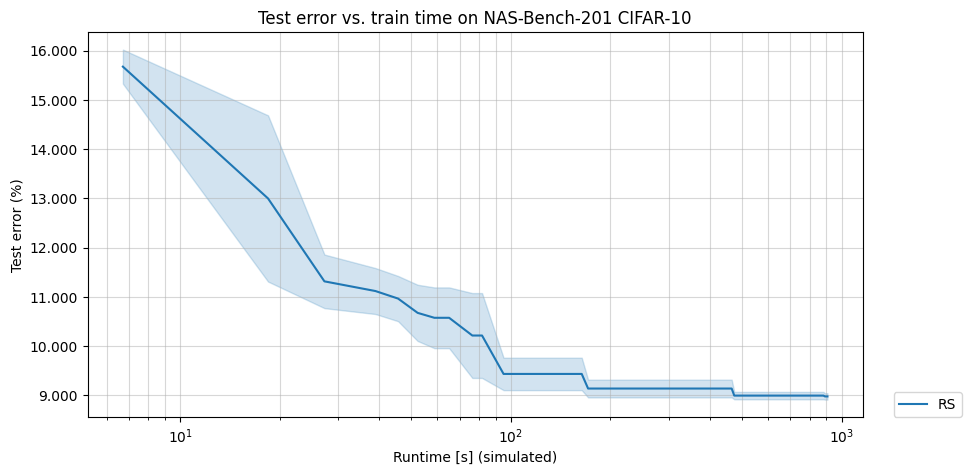

In [ ]:
# Plot RS for three seeds
plot_optimizers(trajectories, benchmark_title="NAS-Bench-201 CIFAR-10")